# <font color=red> Machine Learning Course on Coursera </font>
## Programming Exercise 2: <font color=blue>Logistic Regression</font>

## <font color=green>Logistic regression </font>
>In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.
>Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.
>Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. 


In [174]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns

In [175]:
# import of my own functions
import my_ML_functions
#set up
sigmoid = my_ML_functions.sigmoid

## Let's first import the data and visualize it

In [176]:
data1 = pd.read_csv("logisticReg-ex1dat1.csv",names=['Exam1','Exam2','Admitted'])

In [177]:
data1.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


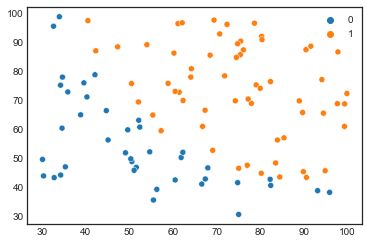

In [178]:
#plot of the Data
sns.scatterplot(x=data1.Exam1.values,y=data1.Exam2.values,hue=data1.Admitted.values,data=data1);

### Cost Function and Batch Gradient Descent
> hypothesis function: h = g(theta.T * X) with g = 1 / (1 + exp(-theta.T * X))

In [232]:
#number of trainig examples
m = np.size(data1.Exam1)
#print(m)
# Hypothesis function: 
#xMat = np.transpose(np.matrix((np.ones(97),data1.Population.values))) # initialization of the X matrix
xMat = np.c_[np.ones(m),data1.Exam1.values,data1.Exam2.values] # same as previous line
yMat = np.transpose(np.matrix([data1.Admitted.values])) # initialization  of the y matrix
#print(theta)
#print(xMat)
#print(xMat.shape,theta.shape)

In [233]:
# for theta = [0.0,0.0,0.0] , J = 0.693
# for theta = [-24,0.2,0.2] , J = 0.218
theta = np.transpose(np.matrix([0.0,0.0,0.0] )) # initialization of theta matrix

# Compute the Cost Function J(theta)
def costfunction(X,y,theta):
    """ Calculate the logistic cost function
    """
    h = sigmoid(np.dot(xMat,theta))
    part1 = yMat.T * np.log(h) # non-zero values when y equal 1
    part2 = (1 - yMat.T) * np.log(1 - h) # non-zero values when y equal 0
    J = (-1/(m))*np.sum(part1 + part2)
    return J

print('The cost function is of',costfunction(xMat,yMat,theta))

# Compute the gradient function
def gradientfunction(xMat,yMat,theta):
    """Calculate the gradient function
    """
    h = sigmoid(np.dot(xMat,theta))
    error = h - yMat # What goes into the sum of the cost functionJ
    #vectorization of the gradient
    gradient = (1/m) * np.dot(error.T,xMat)
    return gradient
    

The cost function is of 0.6931471805599453


0 8.02075333940101
10 0.2083582958754316
20 0.20832780718104996
30 0.2083146705266018
40 0.2083089812082246
50 0.20830650354348265
60 0.20830541091904717
70 0.20830491560864015
80 0.20830467789992704


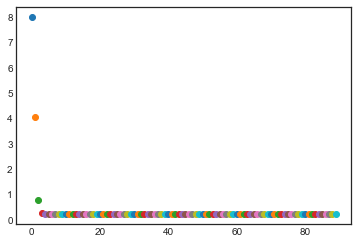

In [242]:
# Performe the batch gradient descent
#
#
theta = np.transpose(np.matrix([-20.0,0.0,0.0] )) # initialization of theta matrix
#
# define the alpha parameters and number of iterations
alpha = 0.001
nIter = 90

for i in range(nIter):
    grad = gradientfunction(xMat,yMat,theta)
    theta = theta - alpha*grad.T
    #print(theta)
    res = costfunction(xMat,yMat,theta)
    if i%10 == 0:
        print(i,res)   
    plt.scatter(i,res)

### Results of the Algorithm

In [243]:
# Results of the Machine Learning Linear Model
results = xMat @ theta
#print(results)
# What are the notes for you two exams ?
x1_note = 45
x2_note = 85
#
my_admission = theta[0] + x1_note*theta[1] + x2_note*theta[2]
#print(my_admission[0])
#results
#print('The Algortihm gives the following hypothesis function:')
print('h = ',theta[0,0],' + ',theta[1,0],'times x1',' + ',theta[2,0],'times x2')
print('According to my note, my admission probability is ',my_admission[0,0], '$')
#

h =  -19.997950089907178  +  0.16492865566592566 times x1  +  0.15971894373786813 times x2
According to my note, my admission probability is  0.9999496327782662 $


In [244]:
res = sigmoid(np.dot(xMat,theta))
res2 = (res >= 0.5).astype(int)
#np.mean(res2 == data1['Admitted'])
res2.flatten()
acc = np.mean(res2.flatten() == data1['Admitted'].values)
acc

0.89

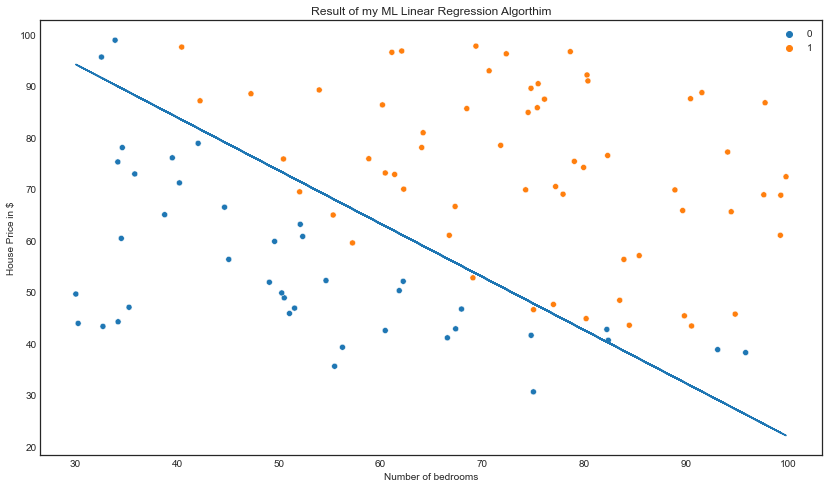

In [245]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(14,8))
plt.title('Result of my ML Linear Regression Algorthim')
#scatterplot
sns.scatterplot(x=data1.Exam1.values,y=data1.Exam2.values,hue=data1.Admitted.values,data=data1);
#plt.scatter(data1.Bedrooms,data1.Price)
#plt.scatter(x_bedroom,my_price[0,0],s = 60,c='red')
plt.xlabel('Number of bedrooms');
plt.ylabel('House Price in $');
#my decision bondary
final_theta = [theta[0,0],theta[1,0],theta[2,0]]
decision_bondary = -(final_theta[0] + final_theta[1]*data1.Exam1.values) /final_theta[2];
plt.plot(data1.Exam1.values,decision_bondary);
#

## <font color=green>Resolution via the Scikit-learn module </font>
>In this part, the problem is the same but we use the Scikit module

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [185]:
#All parameters set to their default
model = LogisticRegression(solver='lbfgs')
X = data1[['Exam1','Exam2']]
y = data1['Admitted']

In [186]:
model.fit(X,y)
predicted_classes = model.predict(X)
accuracy = accuracy_score(y,predicted_classes)
parameters = model.coef_

In [187]:
model.intercept_, model.coef_,accuracy

(array([-25.05219314]), array([[0.20535491, 0.2005838 ]]), 0.89)

In [188]:
#Accuracy of the Model
Final_theta_sk = [model.intercept_[0],model.coef_[0,0],model.coef_[0,1]]

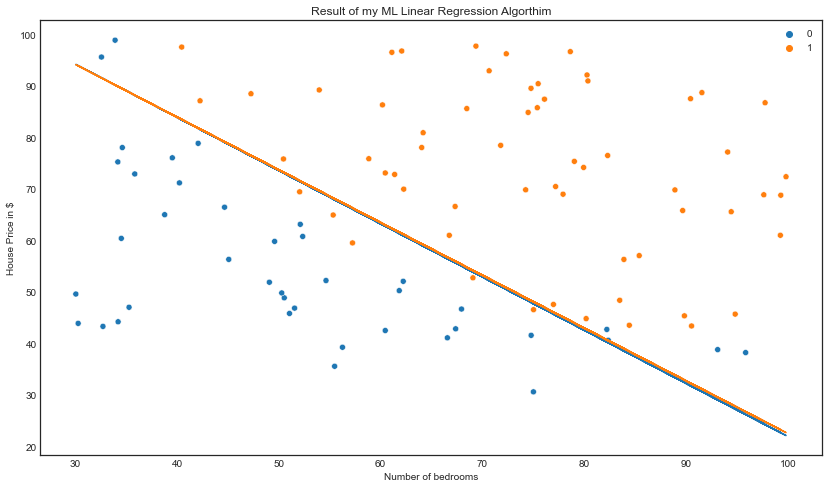

In [246]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(14,8))
plt.title('Result of my ML Linear Regression Algorthim')
#scatterplot
sns.scatterplot(x=data1.Exam1.values,y=data1.Exam2.values,hue=data1.Admitted.values,data=data1);
#plt.scatter(data1.Bedrooms,data1.Price)
#plt.scatter(x_bedroom,my_price[0,0],s = 60,c='red')
plt.xlabel('Number of bedrooms');
plt.ylabel('House Price in $');
#my decision bondary
decision_bondary = -(final_theta[0] + final_theta[1]*data1.Exam1.values) /final_theta[2];
decision_bondary2 = -(Final_theta_sk[0] + Final_theta_sk[1]*data1.Exam1.values) /Final_theta_sk[2];
plt.plot(data1.Exam1.values,decision_bondary);
plt.plot(data1.Exam1.values,decision_bondary2);
#

## <font color=green>Resolution via the Scikit-learn module - methode 2 </font>
>In this part, the problem is the same but we use the Scikit module

> here we divide the data into a training and a test data sets

In [190]:
X = data1[['Exam1','Exam2']]
y = data1['Admitted']
#X = xMat
#y = yMat.ravel()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [191]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
predicted_classes = model.predict(X_train)
accuracy = accuracy_score(y_train,predicted_classes)
parameters = model.intercept_,model.coef_

In [192]:
#Find out our parameters of the model and the accuracy score on the training data
parameters, accuracy

((array([-24.06051097]), array([[0.1906839 , 0.19415147]])),
 0.9066666666666666)

In [193]:
#Find out accuracy score on the test data
model.score(X_test, y_test)

0.84

In [194]:
#Accuracy of the Model
Final_theta_sk2 = [model.intercept_[0],model.coef_[0,0],model.coef_[0,1]]

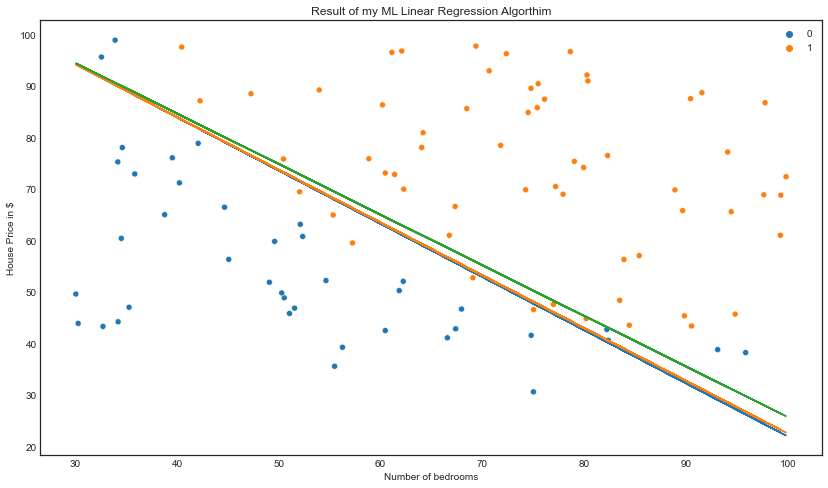

In [247]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(14,8))
plt.title('Result of my ML Linear Regression Algorthim')
#scatterplot
sns.scatterplot(x=data1.Exam1.values,y=data1.Exam2.values,hue=data1.Admitted.values,data=data1);
#plt.scatter(data1.Bedrooms,data1.Price)
#plt.scatter(x_bedroom,my_price[0,0],s = 60,c='red')
plt.xlabel('Number of bedrooms');
plt.ylabel('House Price in $');
#my decision bondary
decision_bondary = -(final_theta[0] + final_theta[1]*data1.Exam1.values) /final_theta[2];
decision_bondary2 = -(Final_theta_sk[0] + Final_theta_sk[1]*data1.Exam1.values) /Final_theta_sk[2];
decision_bondary3 = -(Final_theta_sk2[0] + Final_theta_sk2[1]*data1.Exam1.values) /Final_theta_sk2[2];
plt.plot(data1.Exam1.values,decision_bondary);
plt.plot(data1.Exam1.values,decision_bondary2);
plt.plot(data1.Exam1.values,decision_bondary3);
#